sample distribution after 0 years


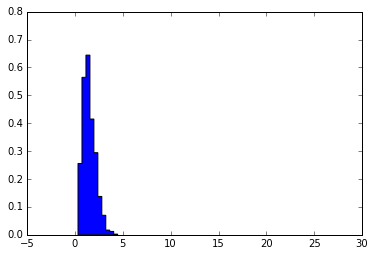

sample distribution after 10 years


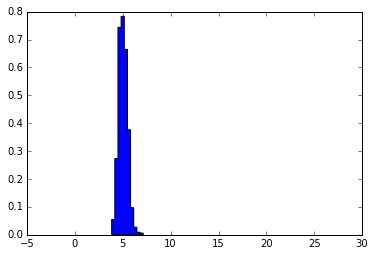

sample distribution after 20 years


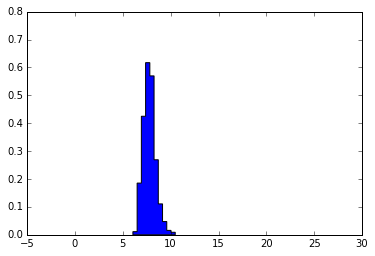

sample distribution after 30 years


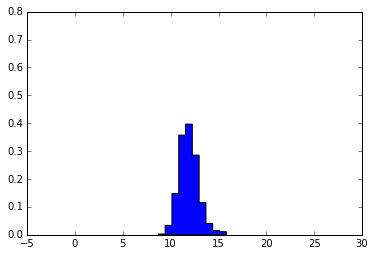

sample distribution after 40 years


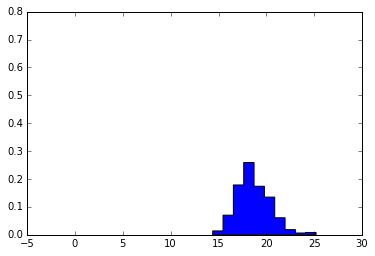

sample distribution after 50 years


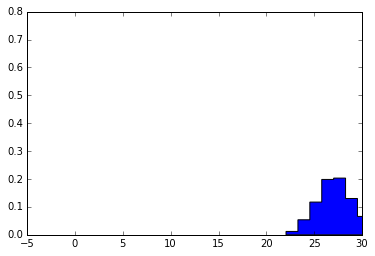

In [110]:
%matplotlib inline
from scipy.stats import frechet_r
import numpy as np
from random import uniform
import matplotlib.pyplot as plt
c=2
lamda=2
r0=frechet_r.rvs(c, loc=0.5/c, scale=(lamda)**(1/c), size=1000)

class search:
    
    def __init__(self, alpha, beta, r):
        self.alpha=alpha
        self.beta=beta
        self.r=r
    
    def newr(self, x):
        new=[]
        for i in range(1000):
            if uniform(0,1)<self.alpha:
                y=self.r[int(uniform(0,1000))]
                z=uniform(0,1.1)
                new.append(max(self.r[i], y*z**self.beta))
            else:
                new.append(self.r[i])
        return new
    
    def update(self):
        self.r=self.newr(self.r)
    
    def gs(self, t):
        path=[]
        for i in range(t):
            path.append(self.r)
            self.update()
        return path
    
    def ghist(self, t, s):
        fig, ax=plt.subplots(1, 1)
        ax.hist(self.gs(t)[s], bins=10, normed=True, histtype='stepfilled', alpha=2)
        ax.set_xlim(-5, 30)
        ax.set_ylim(0, 0.8)
        plt.show()
    
ss=search(0.6, 0.7, r0)
for i in [0, 10, 20, 30, 40, 50]:
    print('sample distribution after {} years'.format(i))
    ss.ghist(60, i)

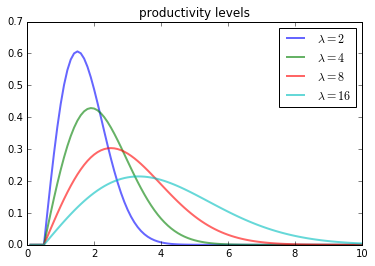

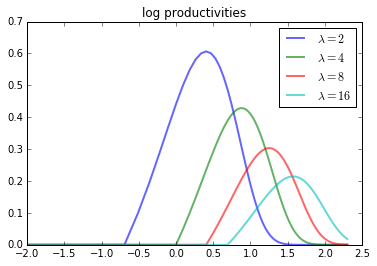

In [108]:
%matplotlib inline
from scipy.stats import genextreme as gev
from scipy.stats import frechet_r
import matplotlib.pyplot as plt
import numpy as np
from random import uniform

lamda=2
fig, ax=plt.subplots(1,1)
c=2
alpha=np.log(2)
x=np.linspace(0.1,10, 100)

for i in range(4):
    F=frechet_r.pdf(x, c, loc=0.5, scale=(lamda)**((i+1)/c))
    currentlabel='$\lambda={}$'.format(2**(i+1))
    ax.plot(x, F, lw=2, alpha=0.6, label=currentlabel)
    ax.legend()
    ax.set_xlim(0, 10)
    ax.set_title('productivity levels')
plt.show()
fig, ax=plt.subplots(1,1)
for i in range(4):
    logx=np.log(x)
    F=frechet_r.pdf(x, c, loc=(i+1)/c, scale=(lamda)**((i+1)/c))
    currentlabel='$\lambda={}$'.format(2**(i+1))
    ax.plot(logx, F, lw=2, alpha=0.6, label=currentlabel)
    ax.legend()
    ax.set_xlim(-2, 2.5)
    ax.set_title('log productivities')
plt.show()

r0=frechet_r.rvs(c, loc=0.5/c, scale=(lamda)**(1/c), size=100)
def newr(r):
    new=[]
    for i in range(100):
        if uniform(0,1)<alpha:
            y=r[int(uniform(0,1)*100)]
            new.append(max(r[i], y))
        else:
            new.append(r[i])
    return new
def r(t):
    if t==0:
        return r0
    return newr(r(t-1))